tensor([-0.0447,  0.9385])
tensor([-0.0447,  0.0655])


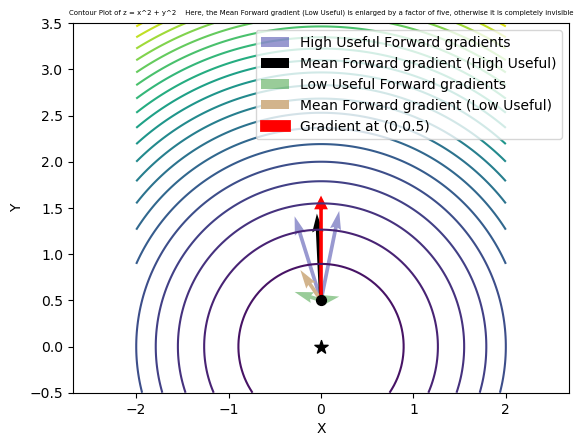

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# 定义函数z和其梯度
def z_func(x, y):
    return x**2 + y**2

def gradient_x(x, y):
    return 2 * x

def gradient_y(x, y):
    return 2 * y

# 生成x和y的坐标
x = np.linspace(-2, 2, 100)
y = np.linspace(-0.5, 3.5, 100)
X, Y = np.meshgrid(x, y)

# 计算z的值
Z = z_func(X, Y)

# 绘制等高线图
plt.contour(X, Y, Z, levels=20, cmap='viridis')

B1 = torch.tensor([[0.2,0.98],[-0.3,0.95]])
B1 = B1/B1.norm(dim=-1)
A1 = torch.tensor([0,1])

C1 = B1*((B1 * A1).sum(dim=-1)).unsqueeze(1)
D1 = torch.mean(C1, dim=0)
print(D1)

# for i,b in enumerate(B1):
#     label = 'High similarity Perturbations' if i == 0 else '_nolegend_'
#     plt.quiver(0, 0.5, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='g', alpha=0.4, label=label)

# 绘制矩阵C中的每个向量
for i,c in enumerate(C1):
    label = 'High Useful Forward gradients' if i == 0 else '_nolegend_'
    plt.quiver(0, 0.5, c[0], c[1], angles='xy', scale_units='xy', scale=1, color='darkblue', alpha=0.4, label=label)
# 绘制向量D
plt.quiver(0, 0.5, D1[0], D1[1], angles='xy', scale_units='xy', scale=1, color='black', label='Mean Forward gradient (High Useful)')


B2 = torch.tensor([[0.98,0.2],[-0.95,0.3]])
B2 = B2/B2.norm(dim=-1)
A2 = torch.tensor([0,1])

C2 = B2*((B2 * A2).sum(dim=-1)).unsqueeze(1)
D2 = torch.mean(C2, dim=0)
print(D2)

# for i,b in enumerate(B2):
#     label = 'Low similarity Perturbations' if i == 0 else '_nolegend_'
#     plt.quiver(0, 0.5, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='darkblue', alpha=0.4, label=label)

# 绘制矩阵C中的每个向量
for i,c in enumerate(C2):
    label = 'Low Useful Forward gradients' if i == 0 else '_nolegend_'
    plt.quiver(0, 0.5, c[0], c[1], angles='xy', scale_units='xy', scale=1, color='g', alpha=0.4, label=label)
# 绘制向量D
plt.quiver(0, 0.5, D2[0], D2[1], angles='xy', scale_units='xy', scale=0.2, color='tan', label='Mean Forward gradient (Low Useful)')



# 在点(1, 1)处标注梯度
gradient_at_point = (gradient_x(0, 0.5), gradient_y(0, 0.5))
plt.arrow(0, 0.5, gradient_at_point[0], gradient_at_point[1],linewidth = 2, head_width=0.1, head_length=0.1, fc='r', ec='r', label='Gradient at (0,0.5)')
plt.scatter(0,0,marker='*', color='black', s=100)
plt.scatter(0,0.5,marker='o', color='black', s=50)

# 添加标签和标题
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of z = x^2 + y^2    Here, the Mean Forward gradient (Low Useful) is enlarged by a factor of five, otherwise it is completely invisible',fontsize=5)

# 显示图形
plt.legend()
plt.axis('equal')  # 设置坐标轴刻度相等，保证等高线图是圆的
# plt.show()
plt.savefig("/data/wyz/ForwardFL-Latex/figs/design-sampling-example.pdf",bbox_inches="tight")
